## I have one directly connected waveform and one waveform with the comb filter at the same beam current 2.005 mA (N:IWCMIG). I'll try to exctract transmission properties of the comb filter from this data.

In [6]:
import numpy as np
import scipy.signal
from scipy.optimize import minimize
from datetime import datetime
from fur.one_data_set_analyzer import analyze_one_dataset
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from datetime import datetime
plt.rcParams['figure.figsize'] = [15, 7.5]
plt.rcParams.update({'font.size': 16,'legend.fontsize':16})
import seaborn as sns
import sys
import os
import fur.path_assistant as path_assistant
from fur.waveform_reader import read_waveform
from fur.finding_period import get_period
from fur.fluctuations import get_fluctiation_and_noise_var
shift_03_16_2020 = path_assistant.PathAssistant('shift_03_16_2020',
    ignore_files=['RefCurve_2020-03-16_0_084020_test.Wfm.bin'])
waveforms_dir = shift_03_16_2020.get_waveforms_dir()
results_dir = shift_03_16_2020.get_results_dir()
bpm_files_df = shift_03_16_2020.get_bpm_files_df()
from config import get_from_config
acnet_data_df = shift_03_16_2020.get_acnet_data_df("all_acnet_data_FLAT_case_03_16_2020.csv")
t1 = datetime(2020, 3, 16, 13, 24, 0)
t2 = datetime(2020, 3, 16, 13, 46, 0)
fluctuation_waveforms_df = shift_03_16_2020.get_fluctuation_waveforms_df()
fluctuation_waveforms_df = fluctuation_waveforms_df[(fluctuation_waveforms_df["file_datetime"] > t1) \
& (fluctuation_waveforms_df["file_datetime"]<t2)].reset_index()
fluctuation_waveforms_df["real_file_datetime"] = fluctuation_waveforms_df["file_datetime"]+pd.Timedelta(get_from_config("RS_scope_time_behind_sec"), unit='s')

In [9]:
t1 = datetime(2020,3,16,12,30)
t2 = datetime(2020,3,16,13,30)
acnet_data_df_short = acnet_data_df[
    (acnet_data_df.index>t1)
    & (acnet_data_df.index<t2)]
fluctuation_waveforms_df_short = fluctuation_waveforms_df[
    (fluctuation_waveforms_df["real_file_datetime"] > t1)
    & (fluctuation_waveforms_df["real_file_datetime"] < t2)
]

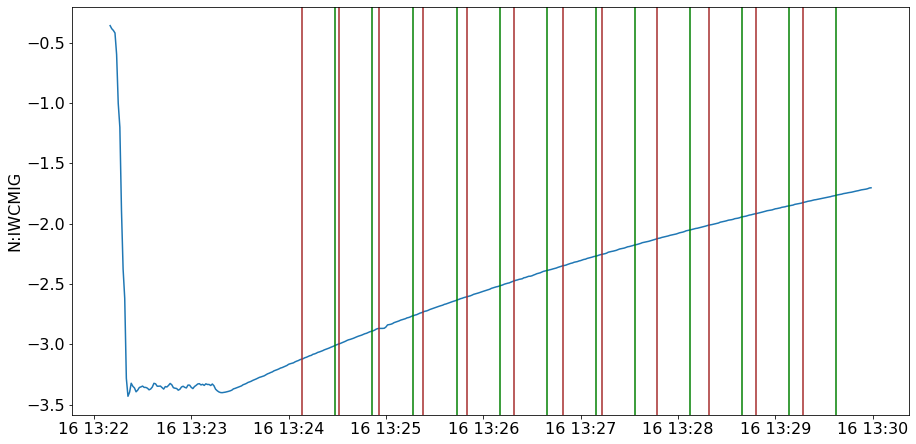

In [10]:
ax = sns.lineplot(x=acnet_data_df_short.index,
                  y=acnet_data_df_short["N:IWCMIG"])
for t in fluctuation_waveforms_df_short["file_datetime"]:
    plt.axvline(t, color="brown")
for t in fluctuation_waveforms_df_short["real_file_datetime"]:
    plt.axvline(t, color="green")
#ax.axhline(-)
plt.show()

In [ ]:
direct_path = waveforms_dir.fi("RefCurve_2020-03-16_1_130532.Wfm.bin")
comb_path = waveforms_dir.fi("RefCurve_2020-03-16_10_132747.Wfm.bin")